In [1]:
import pyMVL
import pickle
import pandas as pd
import numpy as np
from pyMVL.RFM import makeRFM
from pyMVL.RCM import makeRCM, interpolate_shap, replaceOutlierandNormalize, replace_threshold
import matplotlib.pyplot as plt

In [2]:
lin = interpolate_shap('original_glcm_Imc2', radiomics_df, shap_df)

xs = np.arange(0, 1, 0.01)

plt.plot(xs, lin(xs))


KeyboardInterrupt



In [3]:
with open('images.pkl', 'rb') as file:
    images = pickle.load(file)

with open('masks.pkl', 'rb') as file:
    masks = pickle.load(file)

images.pop('N78')
masks.pop('N78')

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'itk::simple::Image *' at 0x0000021741EFE550> >

In [4]:
radiomics_df = pd.read_csv('total_datasets_no_firstorder.csv')
shap_df = pd.read_csv('total_shap_no_firstorder.csv')

In [5]:
extractor = pyMVL.Extractor('total_datasets_no_firstorder.csv', 'total_shap_no_firstorder.csv', 5)

In [6]:
RCM = extractor.execute(images=images, masks=masks)

Image Count = 218, Calculating Radiomics Feature Map..
2d Image
N1 RFM Calculated
N10 RFM Calculated
N100 RFM Calculated
N101 RFM Calculated
N102 RFM Calculated
N103 RFM Calculated
N104 RFM Calculated
N105 RFM Calculated
N106 RFM Calculated
N107 RFM Calculated
N108 RFM Calculated
N11 RFM Calculated
N12 RFM Calculated
N13 RFM Calculated
N14 RFM Calculated
N15 RFM Calculated
N16 RFM Calculated
N17 RFM Calculated
N18 RFM Calculated
N19 RFM Calculated
N2 RFM Calculated
N20 RFM Calculated
N21 RFM Calculated
N22 RFM Calculated
N23 RFM Calculated
N24 RFM Calculated
N25 RFM Calculated
N26 RFM Calculated
N27 RFM Calculated
N28 RFM Calculated
N29 RFM Calculated
N3 RFM Calculated
N30 RFM Calculated
N31 RFM Calculated
N32 RFM Calculated
N33 RFM Calculated
N34 RFM Calculated
N35 RFM Calculated
N36 RFM Calculated
N37 RFM Calculated
N38 RFM Calculated
N39 RFM Calculated
N4 RFM Calculated
N40 RFM Calculated
N41 RFM Calculated
N42 RFM Calculated
N43 RFM Calculated
N44 RFM Calculated
N45 RFM Calculated


In [7]:
RFM = extractor.RFM
RCM = extractor.RCM
Res = extractor.Res
feature_list = extractor.feature_list


print(np.nanmin(RCM['original_glcm_Imc2']['R98']))

-0.8967713148299471


In [29]:
a = replace_threshold(Imc2['N4'], 0.8, 0.1)

In [30]:
print(np.nanmax(a))

0.8


In [22]:
Imc2 = RFM2['original_glcm_Imc2']

Imc2_replaced = replaceOutlierandNormalize(Imc2)

for key in Imc2_replaced.keys():
    print(np.nanmin(Imc2_replaced[key]), np.nanmax(Imc2_replaced[key]))

0.375 1.3384130063052617
0.375 1.3476121130159304
0.375 1.3610336161841965
0.375 1.3396328569861167
0.375 1.3554534208283997
0.375 1.3641577307706767
0.375 1.3570010217167532
0.375 1.3554534208283997
0.375 1.3610336161841965
0.375 1.3554534208283997
0.375 1.3384130063052617
0.375 1.3537712969683775
0.375 1.3554534208283997
0.375 1.3497886599833504
0.375 1.3396328569861167
0.375 1.3537712969683775
0.375 1.3610336161841965
0.375 1.3554534208283997
0.375 1.3537712969683775
0.375 1.3497886599833504
0.375 1.3452447424395437
0.375 1.3610336161841967
0.375 1.3554534208283997
0.375 1.3476121130159302
0.375 1.3452447424395437
0.375 1.3396328569861167
0.375 1.3554534208283997
0.375 1.3570010217167532
0.375 1.3497886599833504
0.375 1.3396328569861167
0.375 1.3537712969683775
0.375 1.3610336161841967
0.375 1.3554534208283997
0.375 1.3554534208283997
0.375 1.3537712969683775
0.375 1.3537712969683775
0.375 1.3554534208283997
0.375 1.3396328569861167
0.375 1.3537712969683775
0.375 1.3384130063052617


In [20]:
print(np.nanmin(RCM['original_glcm_Imc2']['R98']))

print(np.nanmin(RCM2['original_glcm_Imc2']['R98']))

-2.420828147834625
-2.420828147834625


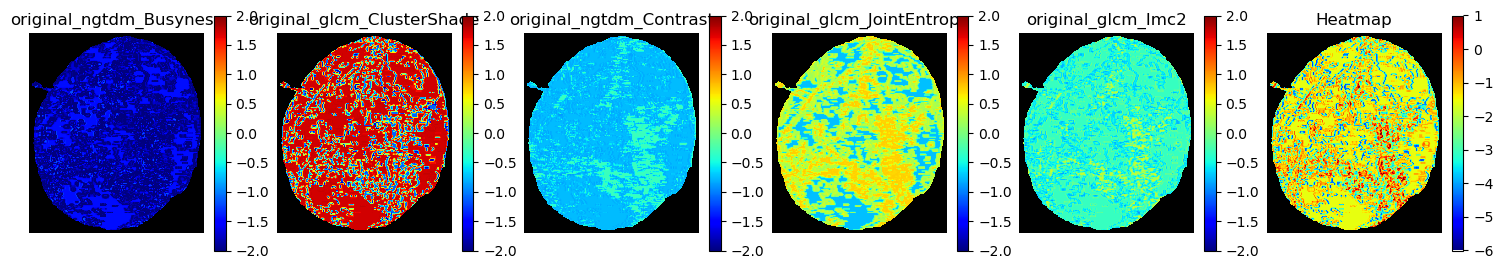

In [8]:
extractor.visualize(file_name = 'R98', feature_scale=(-2, 2), heatmap_scale=(-6, 1))

In [11]:
print(np.nanmax(Res['R16']['original_ngtdm_Contrast']))

# RFM['original_glcm_ClusterShade']['R16'] = Res['R16']['original_glcm_ClusterShade']

print(np.nanmin(RCM['original_glcm_Imc2']['R16']))


0.6997084548104956
-2.398524785442604


In [10]:
RFM2 = extractor.make_RFM()

In [17]:
RFM = makeRFM(Res, feature_list)

print(np.nanmax(RFM['original_ngtdm_Contrast']['R16']), np.nanmax(extractor.RFM['original_ngtdm_Contrast']['R16']))


0.6997084548104956 0.11297376093294459


In [17]:
print((extractor.RCM['original_glcm_ClusterShade']['R16']),(RCM['original_glcm_ClusterShade']['R16']))

[[[nan]
  [nan]
  [nan]
  ...
  [nan]
  [nan]
  [nan]]

 [[nan]
  [nan]
  [nan]
  ...
  [nan]
  [nan]
  [nan]]

 [[nan]
  [nan]
  [nan]
  ...
  [nan]
  [nan]
  [nan]]

 ...

 [[nan]
  [nan]
  [nan]
  ...
  [nan]
  [nan]
  [nan]]

 [[nan]
  [nan]
  [nan]
  ...
  [nan]
  [nan]
  [nan]]

 [[nan]
  [nan]
  [nan]
  ...
  [nan]
  [nan]
  [nan]]] [[[nan]
  [nan]
  [nan]
  ...
  [nan]
  [nan]
  [nan]]

 [[nan]
  [nan]
  [nan]
  ...
  [nan]
  [nan]
  [nan]]

 [[nan]
  [nan]
  [nan]
  ...
  [nan]
  [nan]
  [nan]]

 ...

 [[nan]
  [nan]
  [nan]
  ...
  [nan]
  [nan]
  [nan]]

 [[nan]
  [nan]
  [nan]
  ...
  [nan]
  [nan]
  [nan]]

 [[nan]
  [nan]
  [nan]
  ...
  [nan]
  [nan]
  [nan]]]
